In [1]:
# Imports
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import (GridSearchCV, StratifiedKFold,
                                     cross_validate, train_test_split)
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler


pd.set_option('display.max_columns', 50)

In [2]:
# Load Data
data = pd.read_csv("../data/raw/diabetes_binary_health_indicators_BRFSS2015.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [3]:
data.sample(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
205121,0.0,1.0,1.0,1.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,0.0,0.0,10.0,4.0,3.0
173753,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
183117,0.0,0.0,0.0,0.0,18.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,1.0,2.0,0.0,1.0,9.0,6.0,7.0
185676,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,13.0,5.0,3.0
9607,1.0,1.0,1.0,1.0,33.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,23.0,0.0,1.0,0.0,10.0,3.0,2.0


In [4]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
if data.isna().any().any():
    raise ValueError("There is missing data.")

In [5]:
# Check number of unique counts for each column
data.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [6]:
# Renaming columns
columns = data.columns.str.lower()
data.columns = columns
data.head()

,diabetes_binary,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdiseaseorattack,physactivity,fruits,veggies,hvyalcoholconsump,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [7]:
# Defining column types
numerical_columns = ["bmi","age","income","menthlth","physhlth"]
ordinal_columns = ["education","genhlth"]
nominal_columns = ["diabetes_binary","highbp","highchol","cholcheck","smoker","stroke","heartdiseaseorattack","physactivity","fruits","veggies","hvyalcoholconsump","anyhealthcare","nodocbccost","diffwalk","sex"]

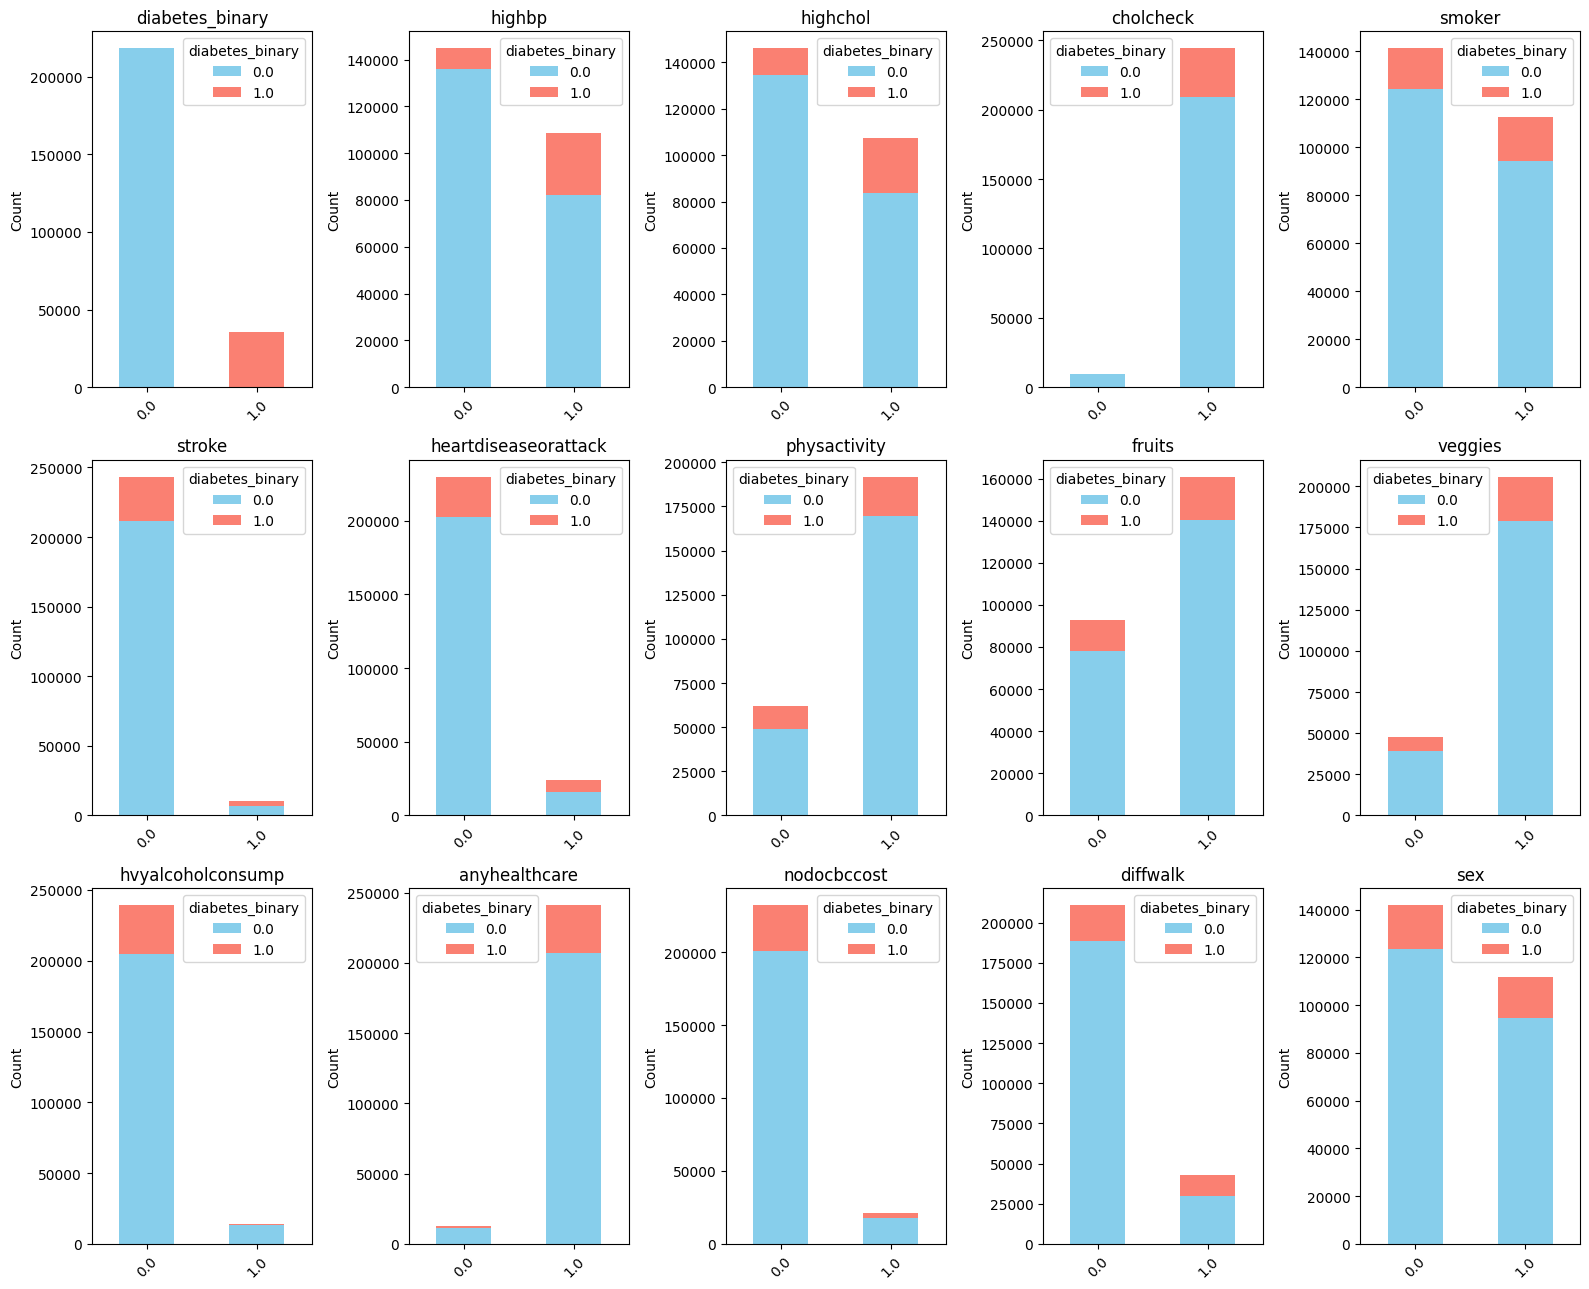

In [8]:
# Plotting Categorical Data with Hue
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(16, 13))
axes = axes.flatten()

for i, col in enumerate(nominal_columns):
    ax = axes[i]
    
    # Count occurrences of each category grouped by diabetes_binary
    value_counts = data.groupby([col, "diabetes_binary"]).size().unstack(fill_value=0)
    
    # Plot grouped bar chart
    value_counts.plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'salmon'])
    
    # Set titles and labels
    ax.set_title(f'{col}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Count', fontsize=10)
    ax.tick_params(axis='x', labelrotation=45)

# Remove unused axes if any
for j in range(len(nominal_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

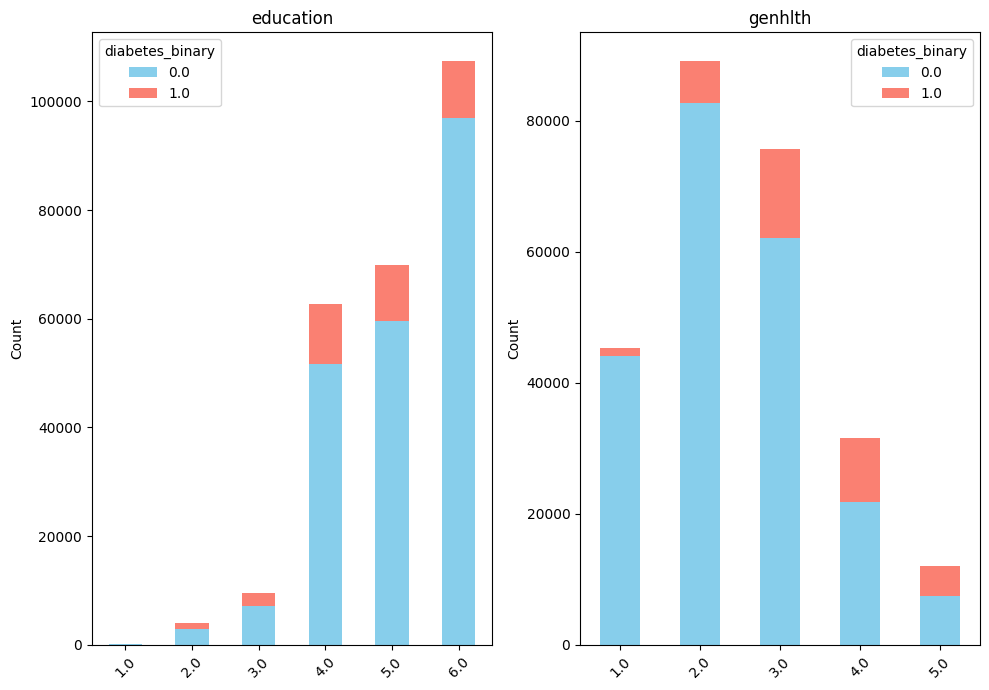

In [9]:
# Plotting Ordinal Data with Hue
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))
axes = axes.flatten()

for i, col in enumerate(ordinal_columns):
    ax = axes[i]
    
    # Count occurrences of each category grouped by diabetes_binary
    value_counts = data.groupby([col, "diabetes_binary"]).size().unstack(fill_value=0)
    
    # Plot grouped bar chart
    value_counts.plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'salmon'])
    
    # Set titles and labels
    ax.set_title(f'{col}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Count', fontsize=10)
    ax.tick_params(axis='x', labelrotation=45)

# Remove unused axes if any
for j in range(len(ordinal_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

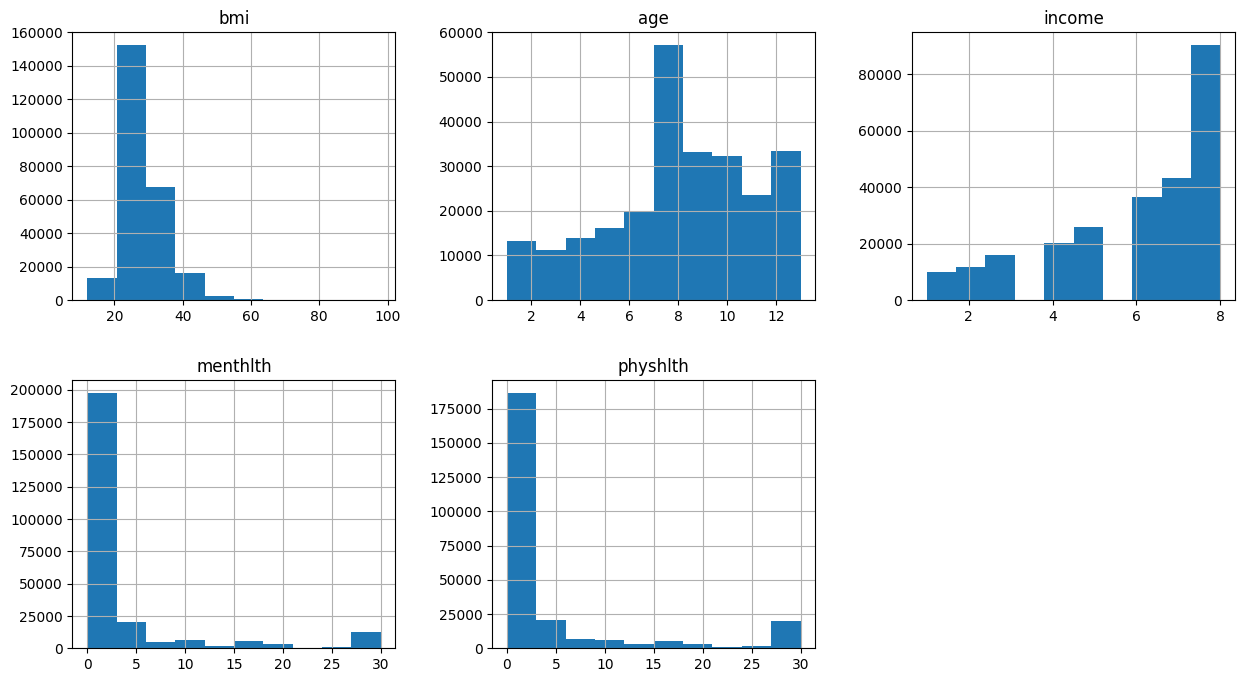

In [10]:
# Exploring Numerical Columns
data[numerical_columns].hist(figsize=(15,8), layout=(2,3))
plt.show()

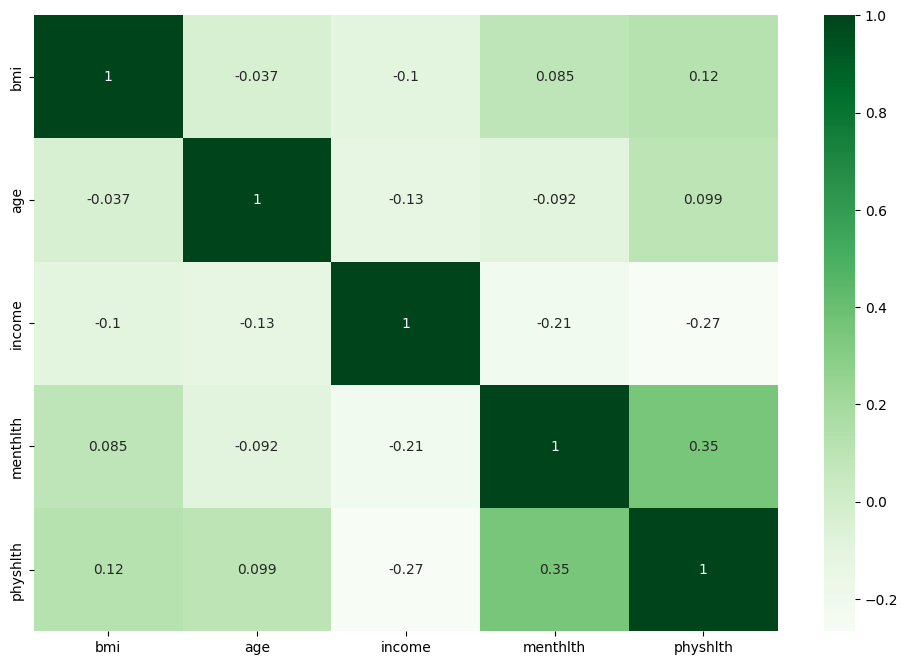

In [ ]:
# Correlation Heatmap Plot of Numerical Data
plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap="Greens")
plt.show()